In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [674]:
df = pd.read_excel("ngshistory.xls", skiprows= [0,1,2,3,4,5], index_col = 0, parse_dates=True )

In [675]:
del df['Source']
del df['South Central Region']
df = df.rename(columns={"Salt":"South Central Salt",
                        "NonSalt":"South Central NonSalt",
                        "East Region":"East",
                        "Midwest Region":"Midwest",
                        "Mountain Region":"Mountain",
                        "Pacific Region":"Pacific"})

In [676]:
df.head()

,East,Midwest,Mountain,Pacific,South Central Salt,South Central NonSalt,Total Lower 48
Week ending,,,,,,,
2010-01-01,769,900,195,268,159,826,3117
2010-01-08,703,820,185,257,123,763,2850
2010-01-15,642,750,176,246,91,702,2607
2010-01-22,616,710,171,235,102,687,2521
2010-01-29,582,661,164,221,108,671,2406


In [677]:
df_5_yr = df.groupby(pd.Grouper(freq='M')).mean().loc['2018':].reset_index()

In [678]:
df_5_yr['month']= df_5_yr['Week ending'].apply(lambda x: x.strftime("%B"))

In [679]:
df_5_yr.head()

,Week ending,East,Midwest,Mountain,Pacific,South Central Salt,South Central NonSalt,Total Lower 48,month
0,2018-01-31,589.50,681.25,151.75,237.00,187.50,614.25,2461.0,January
1,2018-02-28,426.25,459.25,116.50,204.75,180.00,464.75,1851.0,February
2,2018-03-31,282.80,319.00,91.00,169.40,185.20,420.60,1468.0,March
3,2018-04-30,213.00,226.50,84.00,177.50,188.25,425.00,1314.5,April
4,2018-05-31,286.25,277.50,102.50,208.25,220.25,486.25,1581.0,May


In [696]:
month = "May"
month_grps = df_5_yr.groupby('month')
data = month_grps.get_group(month)
data

,Week ending,East,Midwest,Mountain,Pacific,South Central Salt,South Central NonSalt,Total Lower 48,month
4,2018-05-31,286.25,277.50,102.50,208.25,220.25,486.25,1581.00,May
16,2019-05-31,355.80,368.80,88.60,186.60,246.40,515.00,1761.20,May
28,2020-05-31,477.00,580.00,124.80,251.60,343.40,737.20,2514.00,May
40,2021-05-31,375.75,487.75,140.25,251.50,286.25,622.50,2164.25,May
52,2022-05-31,285.00,353.00,99.50,185.00,246.00,519.00,1687.50,May


In [697]:
df_5_yr['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [930]:
data.iloc[-1:, 1:-1]

,East,Midwest,Mountain,Pacific,South Central Salt,South Central NonSalt,Total Lower 48
52,285.0,353.0,99.5,185.0,246.0,519.0,1687.5


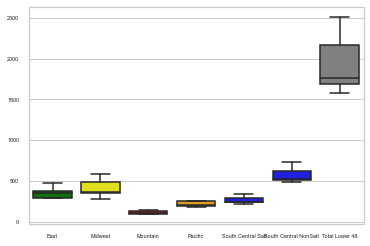

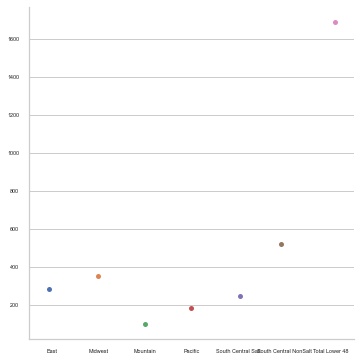

In [956]:
sns.boxplot(data = data, palette=[ "green","yellow","red","orange", "blue", "blue", "gray" ])
sns.catplot(data = data.iloc[-1:]);

In [976]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas

def sns_plot(data):
    fig = Figure(figsize = (5,5))
    ax = fig.add_subplot()
    sns.set(style="whitegrid", font_scale= 0.5)
    p = sns.boxplot(data = data, palette=[ "green","yellow","red","orange", "blue", "blue", "gray" ], ax=ax)
    p = sns.stripplot(data = data.iloc[-1:, 1:-1], size=5, marker="D", color="red", ax=ax)
    ax.tick_params(axis = 'x', labelrotation=25)
    ax.set_ylabel('Billion cubic feet')

    return fig

def select_month(month ="January", view_fn=sns_plot):
    data = month_grps.get_group(month)
    return view_fn(data)


In [977]:
# from matplotlib.figure import Figure
# from matplotlib.backends.backend_agg import FigureCanvas

# def sns_plot(data):
#     fig = Figure(figsize = (5,3))
#     ax = fig.add_subplot()
#     sns.set(style="whitegrid", font_scale= 0.5)
#     b = sns.boxplot(data = data, capsize=.2, palette=[ "green","yellow","red","orange", "blue", "blue", "gray" ], ax=ax)
#     sns.boxplot(data = data.iloc[-1:], 
#                 ax=ax, 
#                 medianprops =dict(color="r"))
#     ax.tick_params(axis = 'x', labelrotation=25)
#     ax.set_ylabel('Billion cubic feet')

#     # get label text

# #     b.set_xticklabels(b.get_xticks(), size=15)
#     return fig

# def select_month(month ="January", view_fn=sns_plot):
#     data = month_grps.get_group(month)
#     return view_fn(data)


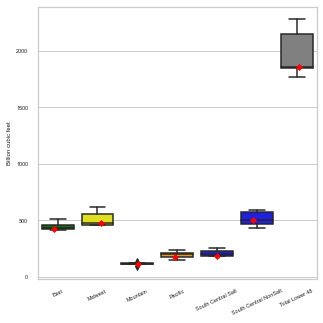

In [978]:
select_month(month ="February")

Column
    [0] Column()
    [1] Row
        [0] Matplotlib(Figure, name='interactive01368')
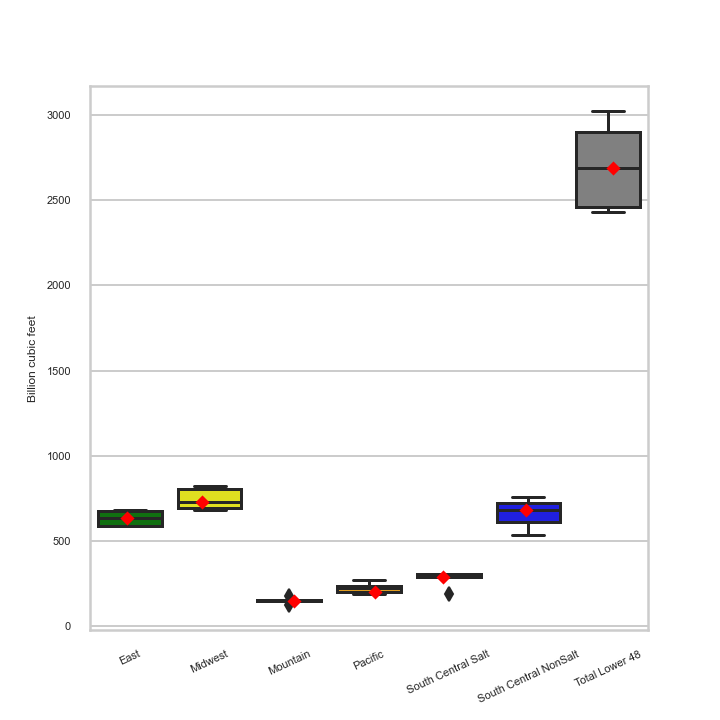

In [979]:
import panel as pn
pn.extension()

pn.interact(select_month)

In [980]:
# years = all_regions.index.strftime( "%Y")
# freqs = ['A-JAN','A-FEB', 'A-MAR', 'A-APR', 'A-MAY', 'A-JUN', 'A-JUL', 'A-AUG', 'A-OCT', 'A-NOV', 'A-DEC']
kw = dict(month=list(df_5_yr['month'].unique()))
i = pn.interact(select_month, **kw)
i.pprint()

Column
    [0] Column
        [0] Select(name='month', options=['January', 'February', ...], value='January')
    [1] Row
        [0] Matplotlib(Figure, name='interactive01378')


Column
    [0] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure, name='interactive01378')
    [1] Row
        [0] Markdown(str)
        [1] Column
            [0] Select(name='month', options=['January', 'February', ...], value='January')
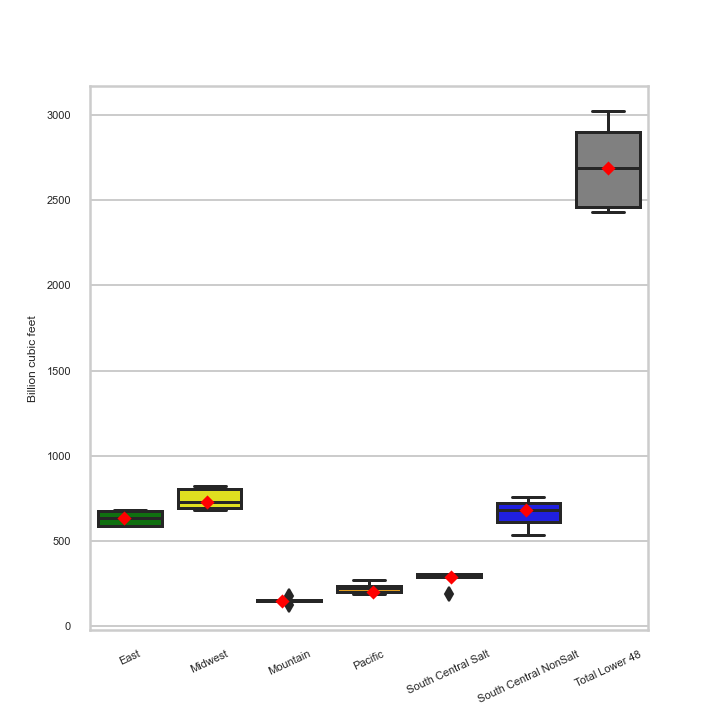

In [982]:
text1 = "<br>\n# Weekly Natural Gas Storage Report"
text2 = "Select a *month* to compare with current stock"
p = pn.Column(pn.Column(text1, i[1][0]), pn.Row(text2, i[0]))
p